In [2]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

In [3]:
training_dir = "dataset/Training"
validation_dir = "dataset/Validation"
input_shape = (224,224,3)

In [4]:
validation_datagen = ImageDataGenerator(rescale = 1./255)

training_datagen = ImageDataGenerator(rescale = 1./255,
                                      horizontal_flip=True,
                                      rotation_range=30,
                                      height_shift_range=0.2,
                                      fill_mode='nearest')

train_generator = training_datagen.flow_from_directory(training_dir,
                                                       target_size=(224,224),
                                                       class_mode='categorical',
                                                       batch_size = 64)

validation_generator = validation_datagen.flow_from_directory(validation_dir,
                                                              target_size=(224,224),
                                                              class_mode='categorical',
                                                              batch_size= 16)


Found 980 images belonging to 2 classes.
Found 239 images belonging to 2 classes.


In [5]:
import keras
from keras import layers
from tensorflow.keras.optimizers import Adam

def fireNet(input_shape):
    
    model = keras.models.Sequential([ layers.Conv2D(96, (11,11), strides=(4,4), activation="relu", input_shape = input_shape),
                                      layers.MaxPooling2D(pool_size=(3,3), strides=(2,2)),
                                      
                                      layers.Conv2D(256, (5,5), activation="relu"),
                                      layers.MaxPooling2D(pool_size=(3,3), strides=(2,2)),
                                      
                                      layers.Conv2D(384, (5,5), activation="relu"),
                                      layers.MaxPooling2D(pool_size=(3,3), strides=(2,2)),
                                    
                                      layers.Flatten(),
                                      layers.Dropout(0.3),
                                     
                                      layers.Dense(2048, activation="relu"),
                                      layers.Dropout(0.3),
                                     
                                      layers.Dense(1024, activation="relu"),
                                      layers.Dropout(0.3),
                                     
                                      layers.Dense(2, activation="softmax")
                                     ])
    
    model.compile(loss = "categorical_crossentropy",
                  optimizer = Adam(lr = 1e-4),
                  metrics = ["acc"])
    
    return model

In [6]:
model = fireNet(input_shape)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 54, 54, 96)        34944     
                                                                 
 max_pooling2d (MaxPooling2  (None, 26, 26, 96)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 22, 256)       614656    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 10, 10, 256)       0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 6, 6, 384)         2457984   
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 2, 2, 384)         0

In [7]:
history = model.fit( train_generator,
                     steps_per_epoch = 15,
                     epochs = 50,
                     validation_data = validation_generator,
                    validation_steps = 15 )

Epoch 1/50



15/15 [==============================] - 49s 3s/step - loss: 0.8138 - acc: 0.6583 - val_loss: 0.5076 - val_acc: 0.7322
Epoch 2/50
15/15 [==============================] - 48s 3s/step - loss: 0.4435 - acc: 0.7875 - val_loss: 0.4535 - val_acc: 0.7782
Epoch 3/50
15/15 [==============================] - 49s 3s/step - loss: 0.4392 - acc: 0.7740 - val_loss: 0.4305 - val_acc: 0.7657
Epoch 4/50
15/15 [==============================] - 46s 3s/step - loss: 0.3729 - acc: 0.8603 - val_loss: 0.3541 - val_acc: 0.8787
Epoch 5/50
15/15 [==============================] - 46s 3s/step - loss: 0.3278 - acc: 0.8843 - val_loss: 0.3055 - val_acc: 0.9079
Epoch 6/50
15/15 [==============================] - 47s 3s/step - loss: 0.2695 - acc: 0.8919 - val_loss: 0.3869 - val_acc: 0.8996
Epoch 7/50
15/15 [==============================] - 47s 3s/step - loss: 0.2849 - acc: 0.9105 - val_loss: 0.3643 - val_acc: 0.9038
Epoch 8/50
15/15 [==============================] - 46s 3s/step - loss: 0.2395 - acc: 0.9236 - val_lo

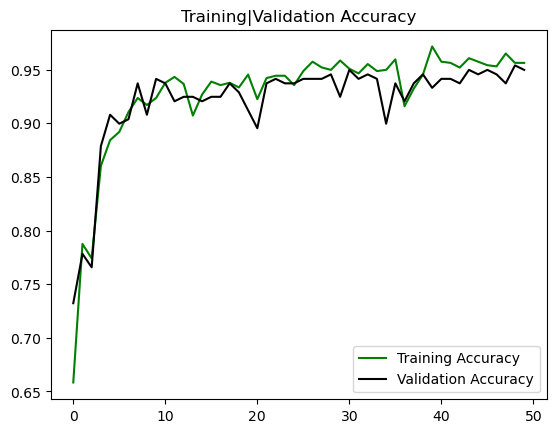

<Figure size 640x480 with 0 Axes>

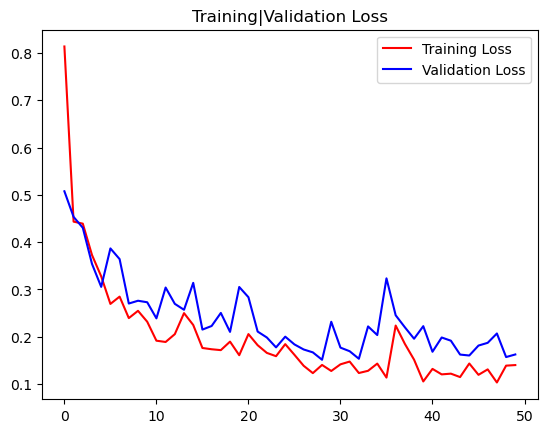

<Figure size 640x480 with 0 Axes>

In [8]:
import matplotlib.pyplot as plt

acc = history.history["acc"]
val_acc = history.history["val_acc"]

loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(0,50)


plt.plot(epochs, acc, "g", label="Training Accuracy")
plt.plot(epochs, val_acc, "black", label="Validation Accuracy")
plt.title("Training|Validation Accuracy")

plt.legend(loc=0)
plt.figure()
plt.show()


plt.plot(epochs, loss, "r",label="Training Loss")
plt.plot(epochs, val_loss, "blue",label="Validation Loss")
plt.title("Training|Validation Loss")

plt.legend(loc=0)
plt.figure()
plt.show()



In [10]:
model.save("models/fire_model.h5")

In [11]:
import cv2
import numpy as np
from keras.models import load_model

In [12]:
model = load_model("models/fire_model.h5")
path = "test/test.jpg"
video_path = "test/test.mp4"

In [16]:
test_img = cv2.imread(path)

img = np.asarray(test_img)
img = cv2.resize(img, (224,224))

img = img/255
#print(img.shape)

img = img.reshape(1,224,224,3)
#print(img.shape)

predictions = model.predict(img)
pred = np.argmax(predictions[0])

probability = predictions[0][pred]
probability_ = "% {:.2f}".format(probability*100)

if pred == 1:
    label = "Fire"
else:
    label = "Neutral"
    
font = cv2.FONT_HERSHEY_SIMPLEX
color = (0,255,0)

cv2.putText(test_img, label, (35,60), font, 1, color, 2)
cv2.putText(test_img, probability_, (35,100), font, 1, color, 2)

cv2.imshow("Prediction", test_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

1/1 [==============================] - 0s 29ms/step


In [17]:
cap = cv2.VideoCapture(video_path)

while True:
    ret,frame = cap.read()
    
    img = np.asarray(frame)
    img = cv2.resize(img, (224,224))

    img = img/255
    #print(img.shape)

    img = img.reshape(1,224,224,3)
    #print(img.shape)

    predictions = model.predict(img)
    pred = np.argmax(predictions[0])

    probability = predictions[0][pred]
    probability_ = "% {:.2f}".format(probability*100)

    if pred == 1:
        label = "Fire"
    else:
        label = "Neutral"

    font = cv2.FONT_HERSHEY_SIMPLEX
    color = (0,255,0)

    cv2.putText(frame, label, (35,60), font, 1, color, 2)
    cv2.putText(frame, probability_, (35,100), font, 1, color, 2)

    cv2.imshow("Prediction", frame)

    if cv2.waitKey(10) & 0xFF == ord("q"):
        break
    
    
cap.release()
cv2.destroyAllWindows()
    



1/1 [==============================] - 0s 31ms/step
